In [693]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import json
import random
import operator

In [2]:
def find_route(json_data, from_id, to_id):
    for item in json_data['routes']:
        if item['source_id'] == from_id and item['target_id'] == to_id:
            return item
    return None  # Если маршрут не найден

In [3]:
def get_point_data(json_data, id):
    for item in json_data['features']:
        if item['id'] == id:
            return item
    return None

In [4]:
data = pd.read_csv("data_hakaton1.csv", index_col=0)
data

,Product_Name,Product_Cost,Manufacture_Date,Expiry_Date,SKU,Store_Name,Store_Address,Region,Sale_Date,Quantity_Sold,Product_Amount,Product_Measure,Product_Volume,Manufacturer
0,Сливочное масло,655.20,2023-05-09 13:42:32,2023-07-08 13:42:32,1039,Натур продукт,"ул. Пушкинская, 5",Санкт-Петербург,2023-05-10 13:42:32,3.0000,600.0000,г,0.0006,"Маслозавод ""Сливка"""
1,Свинина,482.17,2020-08-23 13:57:40,2020-08-26 13:57:40,1036,Эко угол,"ул. Гагарина, 12",Воронеж,2020-08-23 13:57:40,1.4194,1.4194,кг,0.0017,"Агроконцерн ""ЭкоПоляна"""
2,Сливочное масло,190.70,2021-09-20 11:36:09,2021-11-19 11:36:09,1040,Эко центр,"ул. Горького, 2",Воронеж,2021-09-23 11:36:09,1.0000,180.0000,г,0.0002,"ОАО ""Молокозавод №1"""
3,Масло,128.70,2021-02-23 13:41:11,2021-03-25 13:41:11,1019,Натуральный магазин,"ул. Лесная, 14",Санкт-Петербург,2021-03-15 13:41:11,1.0000,1.0000,л,0.0010,"Агроконцерн ""ЭкоПоляна"""
4,Молоко,79.90,2022-02-16 11:14:41,2022-02-21 11:14:41,1003,Натуральный мир,"ул. Пушкинская, 77",Санкт-Петербург,2022-02-19 11:14:41,1.0000,0.9300,л,0.0010,"ОАО ""Молокозавод №1"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,Курица,344.61,2023-06-04 09:34:22,2023-06-09 09:34:22,1030,Органическая лавка,"ул. Лермонтова, 13",Москва,2023-06-05 09:34:22,1.4317,1.4317,кг,0.0017,"Птицефабрика ""Курочка"""
999996,Рис,115.20,2022-02-20 18:42:38,2023-02-20 18:42:38,1028,Фермерский рынок,"ул. Жукова, 11",Ростов-на-Дону,2022-08-29 18:42:38,2.0000,1.8000,кг,0.0022,"Агроконцерн ""ЭкоПоляна"""
999997,Хлеб,61.80,2020-05-30 14:44:04,2020-06-06 14:44:04,1015,Здоровый выбор,"ул. Рабочая, 15",Тверь,2020-06-03 14:44:04,2.0000,1000.0000,г,0.0018,"Пекарня ""Хлебушек"""
999998,Сливочное масло,274.14,2022-02-24 16:04:13,2022-04-25 16:04:13,1040,Эко ферма,"ул. Маяковского, 18",Воронеж,2022-04-04 16:04:13,1.3714,1.3714,кг,0.0014,"Агроконцерн ""ЭкоПоляна"""


In [5]:
data.Product_Name.unique()

array(['Сливочное масло', 'Свинина', 'Масло', 'Молоко',
       'Огурцы маринованные', 'Капуста', 'Сыр', 'Рис', 'Огурцы',
       'Картофель', 'Курица', 'Хлеб', 'Творог', 'Кефир', 'Куриное яйцо',
       'Оливковое масло', 'Морковь', 'Яблоки', 'Свекла', 'Мед'],
      dtype=object)

<Axes: >

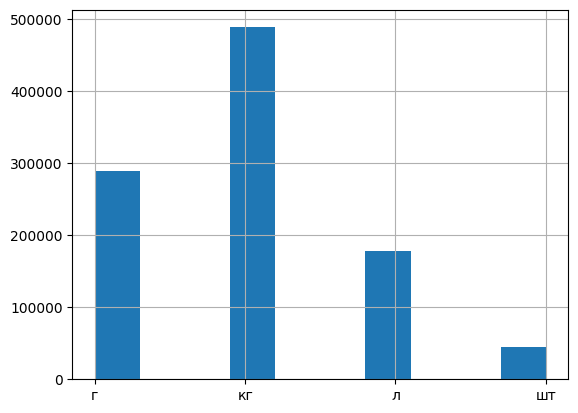

In [6]:
data.Product_Measure.hist()

In [7]:
class Point():
    def __init__(self, id, data_source='data/points.geojson'):
        self.id = id
        with open(data_source, 'r') as f:
            data = json.load(f)
        item = get_point_data(data, id)
        
        self.coords = item['geometry']['coordinates']
        self.name = item['properties']['iconCaption']
        if self.name[:5] == "Склад":
            self.type = 'storage'
        else:
            self.type = 'client'

    def get_distance(self, point, data_source="data/routes.json"):
        with open(data_source, 'r') as f:
            data = json.load(f)
        item = find_route(data, self.id, point.id)
        return item['distance']

    def get_duration(self, point, data_source="data/routes.json"):
        with open(data_source, 'r') as f:
            data = json.load(f)
        item = find_route(data, self.id, point.id)
        return item['duration']
    

In [8]:
point1 = Point(9)
point2 = Point(0)

In [9]:
point1.get_duration(point2)

1512

In [731]:
class Product():
    def __init__(self,
                 id, data=data):
        self.id = id
        row = data.iloc[id]
        self.count = row.Quantity_Sold
        if row.Product_Measure == 'г':
            self.weight = row.Product_Amount / 1000
        else:
            self.weight = row.Product_Amount
        self.volume = row.Product_Volume


In [732]:
class ProductOrder():
    def __init__(self, 
                 point_to, 
                 products
                ):
        self.to_point = point_to
        self.products = products


In [733]:
class Order():
    def __init__(self, 
                 from_point,
                 productOrders,
                 maxCountTrucks=1,
                 truckVolume=100,
                 truckCapacity=1000
                ):
        self.from_point = from_point
        self.productOrders = productOrders
        self.maxCountTrucks = maxCountTrucks
        self.truckVolume = truckVolume
        self.truckCapacity = truckCapacity

In [734]:
class Fitness():
    def __init__(self, order, optimizationOn='time'):
        self.order = order
        self.optimizationOn = optimizationOn
        self.distance = 0.0
        self.fitness = 0.0

    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            fromPoint = self.order.from_point
            for i in range(0, len(self.order.productOrders)+1):
                toPoint = None
                if i < len(self.order.productOrders):
                    toPoint = self.order.productOrders[i].to_point
                else:
                    toPoint = self.order.from_point
                if self.optimizationOn == 'distance':
                    pathDistance += fromPoint.get_distance(toPoint)
                elif self.optimizationOn == 'time':
                    pathDistance += fromPoint.get_duration(toPoint)
                if i < len(self.order.productOrders):
                    fromPoint = self.order.productOrders[i].to_point
            self.distance = pathDistance
        return self.distance

    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [735]:
productlst1 = ProductOrder(Point(1),
                         [Product(0), Product(1)])

productlst2 = ProductOrder(Point(2),
                         [Product(0), Product(1)])

In [736]:
order = Order(
    Point(0),
    [productlst1, productlst2]
)

In [737]:
fit = Fitness(order)
fit.routeDistance()

6191

In [738]:
Point(0).get_duration(Point(1))

2156

In [739]:
Point(1).get_duration(Point(2))

1998

In [740]:
Point(2).get_duration(Point(0))

2037

In [741]:
random.sample([0, 1, 2], 1)

[0]

In [742]:
random.randint(1, 10)

9

In [743]:
def createOrder(productIds, clientIds, storageIds, numProductOrders=5,
               numProducts=10):
    productOrders = []
    for i in range(numProductOrders):
        productOrders.append(ProductOrder(
            Point(clientIds[i]),
            [Product(productIds[j]) 
            for j in range(len(productIds))]
        ))
    productOrders = random.sample(productOrders, len(productOrders))
    order = Order(
        Point(storageIds[0]),
        productOrders
    )
    return order

In [744]:
order = createOrder(
    [i for i in range(100)],
    [i for i in range(3, 20)],
    [0, 1, 2]
)

In [745]:
def initialPopulation(popSize, productIds, clientIds, storageIds, numProductOrders=5,
               numProducts=10):
    population = []

    for i in range(0, popSize):
        population.append(createOrder(productIds, clientIds, storageIds, numProductOrders=numProductOrders))
    return population

In [746]:
def rankOrders(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [747]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [748]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [749]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1.productOrders))
    geneB = int(random.random() * len(parent1.productOrders))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)
    for i in range(startGene, endGene):
        childP1.append(parent1.productOrders[i].to_point.id)
    childP2 = [item.to_point.id for item in parent2.productOrders if item.to_point.id not in childP1]
    child = childP1 + childP2

    parent = Order(
        Point(parent1.from_point.id),
        [ProductOrder(
        Point(point_id),
        parent1.productOrders[0].products
    ) for point_id in child]
    )
    
    return parent

In [750]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))
    for i in range(0,eliteSize):
        children.append(matingpool[i])
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [751]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual.productOrders)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual.productOrders))
            
            city1 = individual.productOrders[swapped]
            city2 = individual.productOrders[swapWith]
            
            individual.productOrders[swapped] = city2
            individual.productOrders[swapWith] = city1
    return individual

In [752]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [753]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankOrders(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    # print([item.to_point.id for item in matingpool[0].productOrders])
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    nextGeneration = children
    return nextGeneration

In [921]:
def geneticAlgorithm(clientIds, storageIds, popSize, eliteSize, mutationRate, generations,
                    numProductOrders=10, numProducts=10, productIds=[]):
    pop = initialPopulation(popSize, productIds, clientIds, storageIds, numProductOrders=numProductOrders)
    progress = []
    progress.append(1 / rankOrders(pop)[0][1])
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankOrders(pop)[0][1])
        if i % 10 == 0:
            bestRouteIndex = rankOrders(pop)[0][0]
            bestRoute = pop[bestRouteIndex]
            route = [(item.to_point.coords[0], item.to_point.coords[1]) for item in bestRoute.productOrders]
    bestRouteIndex = rankOrders(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [781]:
import time
from sklearn.cluster import KMeans

In [838]:
def custom_distance(x1, x2):
    if on == "time":
        return Point(x1).get_duration(x2)

In [898]:
def cluster_points(points, num_clusters):
    # Извлечение координат точек
    coordinates = [point[1] for point in points]

    # Создание модели KMeans
    kmeans = KMeans(n_clusters=num_clusters)

    # Проведение кластеризации
    kmeans.fit(coordinates)

    # Получение меток кластеров для каждой точки
    labels = kmeans.labels_

    # Создание словаря для хранения точек по кластерам
    clusters = {i: [] for i in range(num_clusters)}

    # Добавление точек в соответствующие кластеры
    for i, label in enumerate(labels):
        point_id, (x, y) = points[i]
        clusters[label].append(point_id)

    return clusters

In [899]:
def plot_clustered_points(points, clustered_points):
    # Создание пустого словаря для хранения координат точек кластеров
    cluster_coordinates = {cluster_id: [] for cluster_id in clustered_points}

    # Заполнение словаря координатами точек для каждого кластера
    for cluster_id, point_ids in clustered_points.items():
        for point_id in point_ids:
            # Находим координаты точки по её id
            for point in points:
                if point[0] == point_id:
                    cluster_coordinates[cluster_id].append(point[1])

    # Создание цветовой схемы для кластеров
    colors = plt.cm.tab10.colors[:len(clustered_points)]

    # Создание графика
    plt.figure(figsize=(10, 8))

    # Для каждого кластера
    for cluster_id, coordinates in cluster_coordinates.items():
        color = colors[cluster_id]

        # Отображение точек кластера на графике с соответствующим цветом
        for x, y in coordinates:
            plt.scatter(x, y, color=color, label=f'Cluster {cluster_id}')

    # Добавление легенды
    plt.legend()

    # Отображение графика
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Clustered Points')
    plt.grid(True)
    plt.show()


In [925]:
def get_routes(from_point_id, point_ids, num_trucks=1):
    points = [Point(id) for id in point_ids]
    points = [(point.id, (point.coords[0], point.coords[1])) for point in points]
    clustered_points = cluster_points(points, num_trucks)

    ans = []
    for cluster, clients in clustered_points.items():
        n = len(clients)
        popSize = int(15 + 15*(n/20))
        eliteSize = popSize // 3
        generations = int(50 * (n/20) + 10)
        best_gen = geneticAlgorithm(clients, 
                            [from_point_id], 
                            popSize=popSize, eliteSize=eliteSize, mutationRate=0.05, 
                            generations=generations,
                            numProductOrders=n,
                            points_data=,
                            routes_data=)
        ans.append([from_point_id] + [item.to_point.id for item in best_gen.productOrders] + [from_point_id])
    return ans

In [926]:
points = [4, 8, 9,10, 13]
points = get_routes(2, points, 2)

/home/daniil/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [927]:
points

[[2, 9, 4, 8, 13, 2], [2, 10, 2]]

In [915]:
[item.to_point.id for item in best_gen.productOrders]

[4, 19, 14, 6, 9, 8, 3, 7, 10, 5, 17, 16, 12, 15, 11, 18, 13]

Initial distance: 18965.0
0 distance: 17993.0


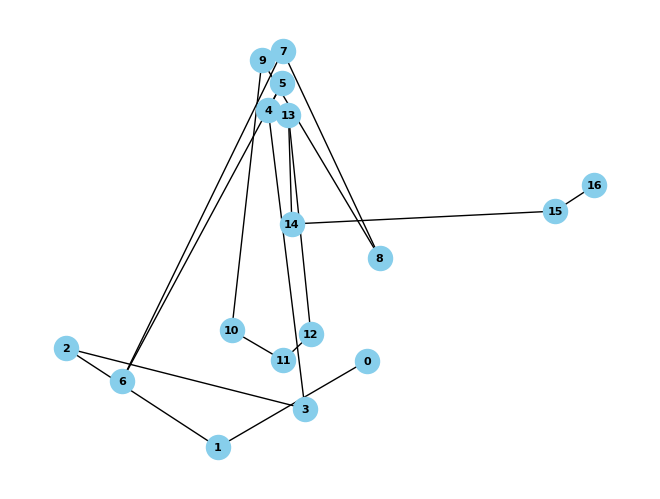

10 distance: 14025.0


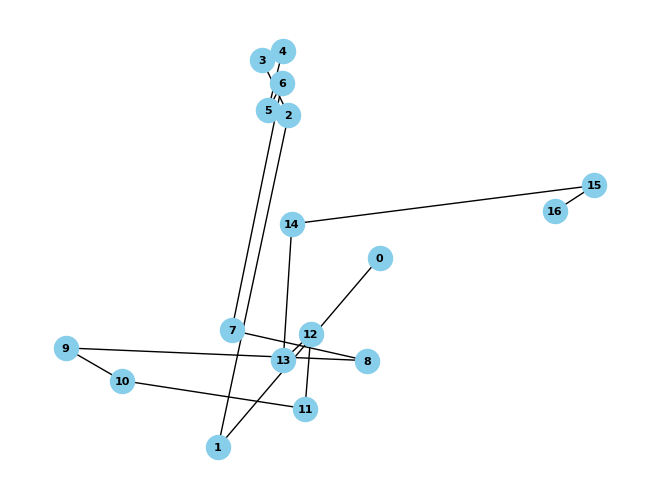

20 distance: 13275.0


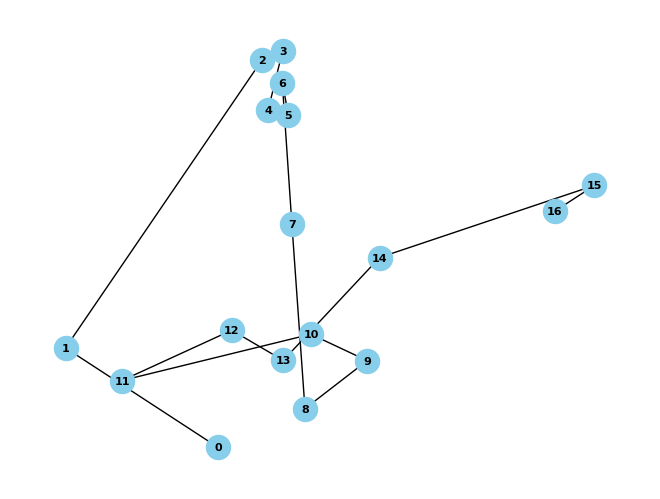

30 distance: 12996.0


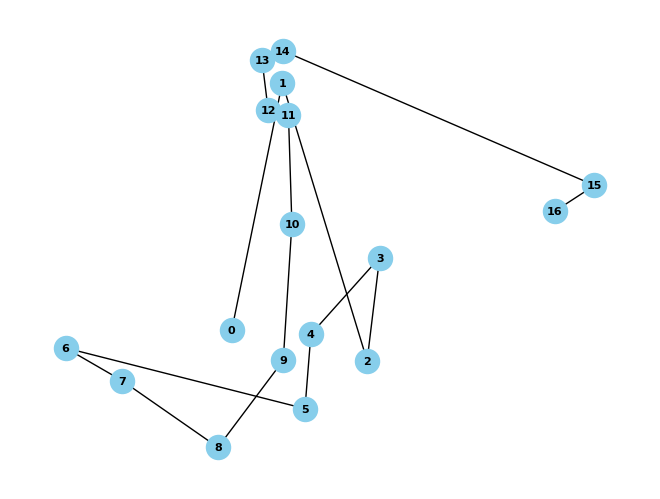

40 distance: 12871.0


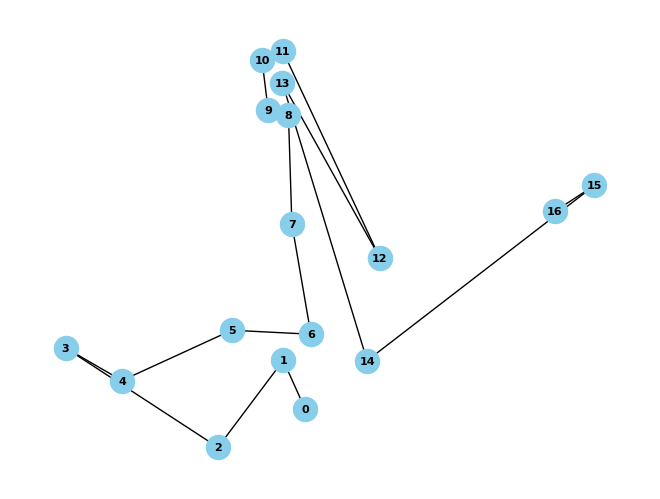

50 distance: 12981.999999999998


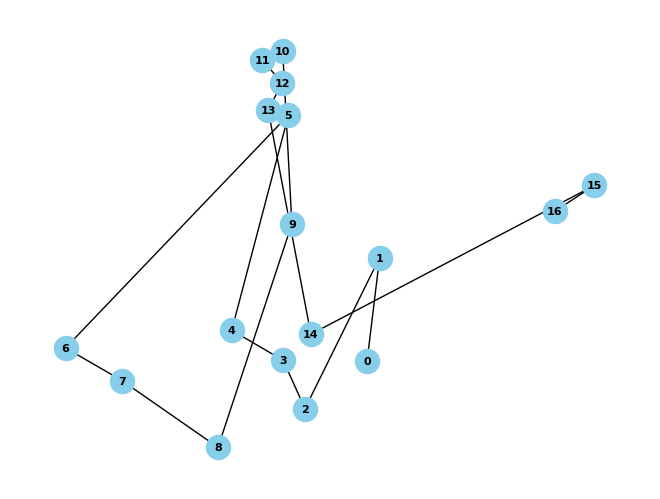

60 distance: 12499.0


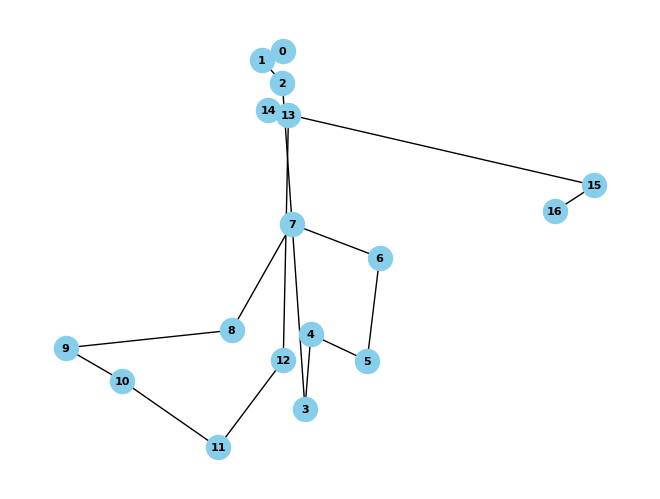

70 distance: 13463.0


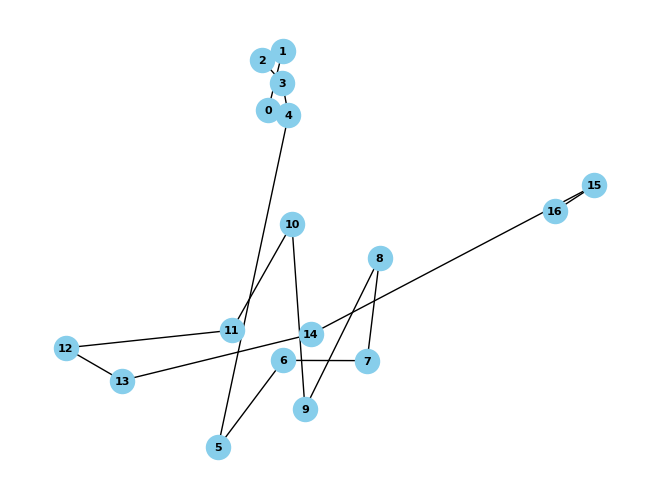

80 distance: 11449.0


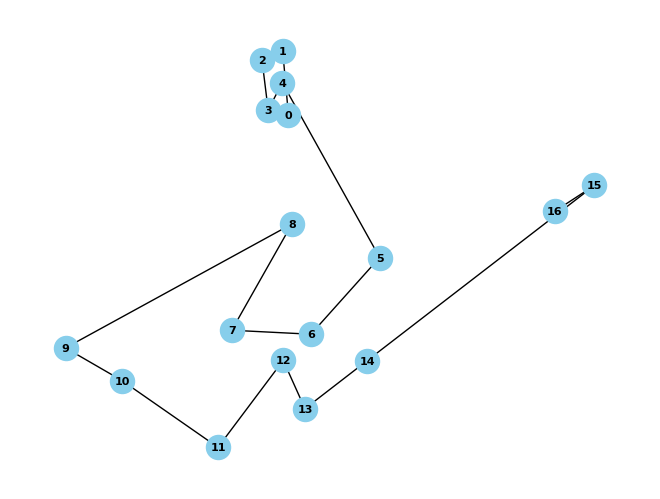

90 distance: 12272.0


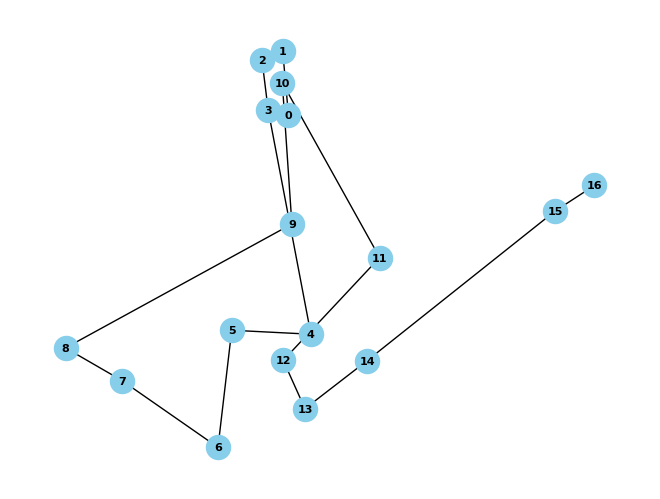

99 Final distance: 12143.0


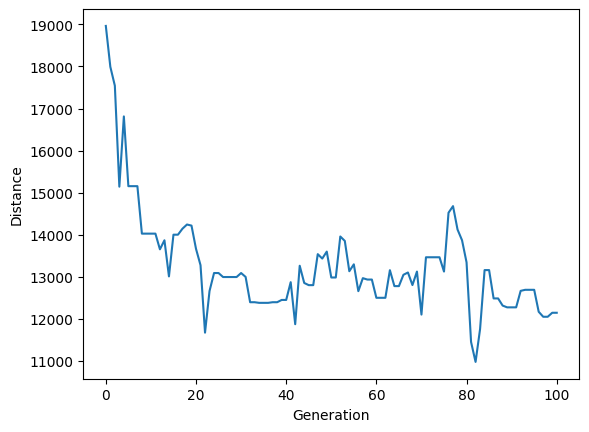

Время выполнения функции: 71.89611530303955 секунд


In [763]:
start_time = time.time()

products = [0, 1, 2]
points = [i for i in range(3, 20)]

best_gen = geneticAlgorithm(products, 
                            points, 
                            [2], 
                            popSize=30, eliteSize=10, mutationRate=0.05, 
                            generations=100,
                            numProductOrders=len(points))

end_time = time.time()

# Вычисляем время выполнения
execution_time = end_time - start_time

print(f"Время выполнения функции: {execution_time} секунд")

In [702]:
route = [(item.to_point.coords[0], item.to_point.coords[1]) for item in best_gen.productOrders]

In [757]:
def draw_route(points):
    # Создаем пустой граф
    G = nx.Graph()

    # Добавляем вершины в граф
    for i, point in enumerate(points):
        G.add_node(i, pos=point)

    # Добавляем ребра между соседними точками
    for i in range(1, len(points)):
        G.add_edge(i-1, i)

    # Нарисуем граф
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=True, node_size=300, node_color="skyblue", font_size=8, font_color="black", font_weight="bold")
    plt.show()

{0: (39.72594068059336, 47.22374472355615), 1: (39.72910032281427, 47.23876257697241), 2: (39.714369630902226, 47.233483067332536), 3: (39.67961893090743, 47.21593813109179), 4: (39.682204580395364, 47.23015798206508), 5: (39.69366297730705, 47.22882423487829), 6: (39.68693599710009, 47.23956633164624), 7: (39.59843919286214, 47.23600049098978), 8: (39.628485298247014, 47.229416201640326), 9: (39.71715376386022, 47.282980074452155), 10: (39.706339097112206, 47.28401677480058), 11: (39.71406385907592, 47.29597385444908), 12: (39.71387074002605, 47.289506565757236), 13: (39.71897230157399, 47.261000134795374), 14: (39.70305607327881, 47.294083386054844), 15: (39.7501342059062, 47.272056975434985), 16: (39.765701747031066, 47.254236353759296), 17: (39.859085536092856, 47.26360023578127), 18: (39.88010332593272, 47.26878544442458), 19: (39.759039139838215, 47.23343191210797)}


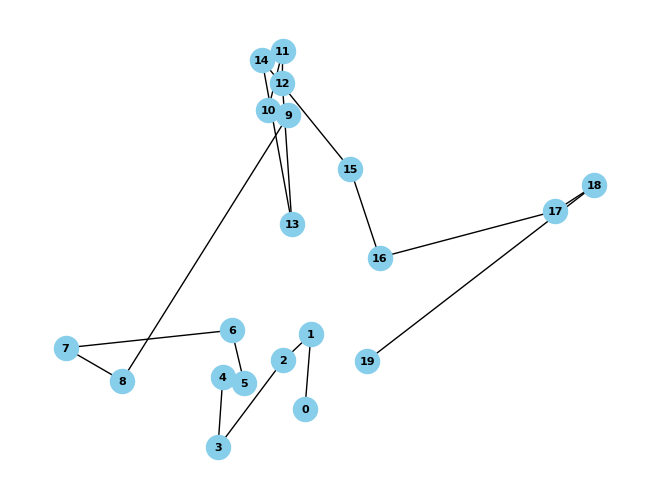

In [704]:
draw_route(route)

Вход:
clients: [client_id]
storage_id: int
num_trucks: int

Выход:
Массив размерности (num_trucks, num_clients+2)
[[id]]